# Class Analysis

Each output class has the following label: df['next_status_60_row']  + df['next_status_60_column']
Associate each label a number

In [1]:
import pandas as pd

df = pd.read_csv('source/ais_data_next_status_60.csv')

In [2]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,class,column,course,date_time,index,latitude,longitude,mmsi,next_status_60_column,next_status_60_date_time,next_status_60_row,row,speed
0,13,13,13.0,0.0,126.0,0.571429,2016-10-26 00:20:28+00:00,15568808.0,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:20:27+00:00,340.0,353.0,0.666667
1,14,14,14.0,0.0,126.0,0.571429,2016-10-26 00:23:29+00:00,15568993.0,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:23:29+00:00,340.0,353.0,0.666667
2,15,15,15.0,0.0,127.0,0.571429,2016-10-26 00:35:27+00:00,15569644.0,34.95978,12.71980,111247508.0,129.0,2016-10-26 01:35:18+00:00,340.0,349.0,0.666667
3,16,16,16.0,0.0,128.0,0.571429,2016-10-26 00:56:17+00:00,15570855.0,34.21719,12.88836,111247508.0,128.0,2016-10-26 01:56:21+00:00,342.0,342.0,0.333333
4,17,17,17.0,0.0,129.0,0.000000,2016-10-26 01:11:10+00:00,15571708.0,34.01085,12.97691,111247508.0,127.0,2016-10-26 02:11:24+00:00,348.0,340.0,0.333333


In [4]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'index'], axis=1, inplace=True)

In [5]:
df.head()

,class,column,course,date_time,latitude,longitude,mmsi,next_status_60_column,next_status_60_date_time,next_status_60_row,row,speed
0,0.0,126.0,0.571429,2016-10-26 00:20:28+00:00,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:20:27+00:00,340.0,353.0,0.666667
1,0.0,126.0,0.571429,2016-10-26 00:23:29+00:00,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:23:29+00:00,340.0,353.0,0.666667
2,0.0,127.0,0.571429,2016-10-26 00:35:27+00:00,34.95978,12.71980,111247508.0,129.0,2016-10-26 01:35:18+00:00,340.0,349.0,0.666667
3,0.0,128.0,0.571429,2016-10-26 00:56:17+00:00,34.21719,12.88836,111247508.0,128.0,2016-10-26 01:56:21+00:00,342.0,342.0,0.333333
4,0.0,129.0,0.000000,2016-10-26 01:11:10+00:00,34.01085,12.97691,111247508.0,127.0,2016-10-26 02:11:24+00:00,348.0,340.0,0.333333


In [21]:
df['target_label'] = df['next_status_60_row'].astype(int).astype(str) + '_' +  df['next_status_60_column'].astype(int).astype(str)

In [23]:
df['target_label'].head()

0    340_129
1    340_129
2    340_129
3    342_128
4    348_127
Name: target_label, dtype: object

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
target = mlb.fit_transform([df['target_label'].tolist()])[0]

In [34]:
len(mlb.classes_)

2586

In [35]:
len(target)

2586

In [51]:
def get_target(x):
    return mlb.transform([x]).tolist()[0].index(1)

In [53]:
df['target'] = df['target_label'].apply(lambda x: get_target([x]))

In [54]:
df['target'].head()

0     675
1     675
2     675
3     794
4    1110
Name: target, dtype: int64

Text(0.5, 1.0, 'Target Distribution')

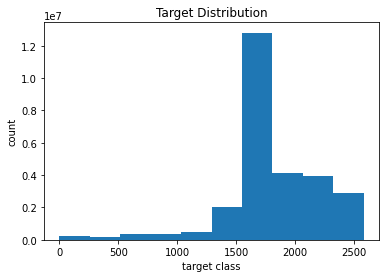

In [55]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["target"])

# set x/y labels and plot title
plt.pyplot.xlabel("target class")
plt.pyplot.ylabel("count")
plt.pyplot.title("Target Distribution")

In [56]:
target_distribution = df['target'].value_counts()

In [57]:
target_distribution.min()

1

In [58]:
target_distribution.max()

1575185

In [59]:
target_distribution.mean()

10596.84068058778

# Standardization

Standardize row and column. Use simple scaling

In [60]:
df['row'] = df['row']/df['row'].max()

In [61]:
df['column'] = df['column']/df['column'].max()

In [62]:
df.head()

,class,column,course,date_time,latitude,longitude,mmsi,next_status_60_column,next_status_60_date_time,next_status_60_row,row,speed,target_label,target
0,0.0,0.78750,0.571429,2016-10-26 00:20:28+00:00,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:20:27+00:00,340.0,0.936340,0.666667,340_129,675
1,0.0,0.78750,0.571429,2016-10-26 00:23:29+00:00,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:23:29+00:00,340.0,0.936340,0.666667,340_129,675
2,0.0,0.79375,0.571429,2016-10-26 00:35:27+00:00,34.95978,12.71980,111247508.0,129.0,2016-10-26 01:35:18+00:00,340.0,0.925729,0.666667,340_129,675
3,0.0,0.80000,0.571429,2016-10-26 00:56:17+00:00,34.21719,12.88836,111247508.0,128.0,2016-10-26 01:56:21+00:00,342.0,0.907162,0.333333,342_128,794
4,0.0,0.80625,0.000000,2016-10-26 01:11:10+00:00,34.01085,12.97691,111247508.0,127.0,2016-10-26 02:11:24+00:00,348.0,0.901857,0.333333,348_127,1110


In [68]:
from datetime import datetime
def get_day_of_year(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S+00:00').timetuple().tm_yday  # returns 1 for January 1st

df['day'] = df['date_time'].apply(lambda x: get_day_of_year(x))

In [72]:
def get_hour_of_day(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S+00:00').timetuple().tm_hour  # returns 1 for January 1st

df['hour'] = df['date_time'].apply(lambda x: get_hour_of_day(x))

In [73]:
df['hour'] = df['hour']/df['hour'].max()
df['day'] = df['day']/df['day'].max()

In [74]:
df.shape

(27403430, 16)

In [75]:
columns = ['class', 'course', 'speed', 'row','column','hour','day','target']
df.to_csv('source/dataset_60.csv', columns = columns)

In [76]:
df.head()

,class,column,course,date_time,latitude,longitude,mmsi,next_status_60_column,next_status_60_date_time,next_status_60_row,row,speed,target_label,target,day,hour
0,0.0,0.78750,0.571429,2016-10-26 00:20:28+00:00,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:20:27+00:00,340.0,0.936340,0.666667,340_129,675,0.819672,0.000000
1,0.0,0.78750,0.571429,2016-10-26 00:23:29+00:00,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:23:29+00:00,340.0,0.936340,0.666667,340_129,675,0.819672,0.000000
2,0.0,0.79375,0.571429,2016-10-26 00:35:27+00:00,34.95978,12.71980,111247508.0,129.0,2016-10-26 01:35:18+00:00,340.0,0.925729,0.666667,340_129,675,0.819672,0.000000
3,0.0,0.80000,0.571429,2016-10-26 00:56:17+00:00,34.21719,12.88836,111247508.0,128.0,2016-10-26 01:56:21+00:00,342.0,0.907162,0.333333,342_128,794,0.819672,0.000000
4,0.0,0.80625,0.000000,2016-10-26 01:11:10+00:00,34.01085,12.97691,111247508.0,127.0,2016-10-26 02:11:24+00:00,348.0,0.901857,0.333333,348_127,1110,0.819672,0.043478
